# Laplace Model Analysis

In this Jupyter Notebook, I compare two different mathematical models for estimating the magnetic field at different locations on a conducting surface. One is the analytical solution (which relies on calculations from fundamental Physics E&M formulas), and the other is the Finite Difference technique (a geometric solution). 

### Import relevant libraries, set color map, and define geometric constants

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sci


plt.set_cmap('plasma')


a=0.28 #length
b=0.20 #height
V=19.62 #maximum voltage

<Figure size 640x480 with 0 Axes>

### Define functions

In [7]:
#calculate the multiplicative constant for any term, n, in the formula
def globinic(n):
    An=4*19.62/(np.pi*(2*n-1)*np.sinh((2*n-1)/0.28*np.pi*0.20))
    return An

#calculate the analytical expected voltage at any point, x & Y (in cm), with numTerms, number of terms
def calc(x,y,numTerms):
    mrSum=0
    for term in np.arange(1,numTerms+1,1):
        thisOne=globinic(term)*np.sinh(term*np.pi*y/0.28)*np.sin(term*np.pi*x/0.28)
        mrSum+=thisOne
    return(mrSum)

### Conduct a simple visual analysis to determine how many terms, n, from the analytical solution to use to calculate each value, to ensure reliable results and computational efficiency

Text(0, 0.5, 'Estimate Avg (V)')

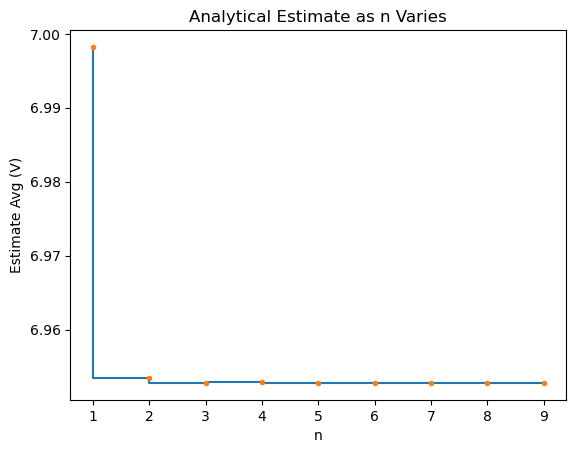

In [10]:
#number of terms to be calculated
nCheck=np.arange(1,10,1)
estimationCollection=np.array([])

#find the estimate at each point for each number of terms
for all in nCheck:
    estimationCollection=(np.append(estimationCollection,(calc(a/2,b/2,all)+calc(a/3,b/3,all)+calc(2*a/3,2*b/3,all))/3))

#plot results
plt.step(nCheck,estimationCollection)
plt.plot(nCheck,estimationCollection,'.')
plt.title("Analytical Estimate as n Varies")
plt.xlabel("n")
plt.ylabel("Estimate Avg (V)")

### Define arrays for location on conductor and results

In [ ]:
xArray=np.linspace(0.01,a,28)
yArray=np.linspace(0.01,b-0.01,19)
yArray=np.flip(yArray)

#establish a 2D array for results of the analytic function
analyticArray=np.zeros((len(yArray),len(xArray)))

### Calculate analytical results and plot

Text(0, 0.5, 'cm from top')

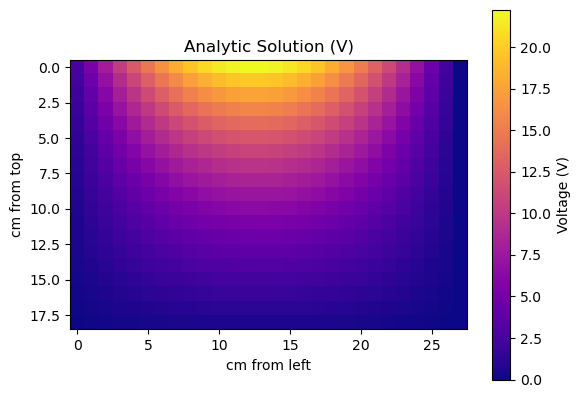

In [11]:
for xs in range(len(xArray)):
    for ys in range(len(yArray)):
        
        analyticArray[ys][xs]=calc(xArray[xs],yArray[ys],10)
        
        
plt.figure()
plt.imshow(analyticArray)
plt.colorbar(label="Voltage (V)")
plt.title("Analytic Solution (V)")
plt.xlabel("cm from left")
plt.ylabel("cm from top")

### Import experimental data and plot

Text(0, 0.5, 'cm from top')

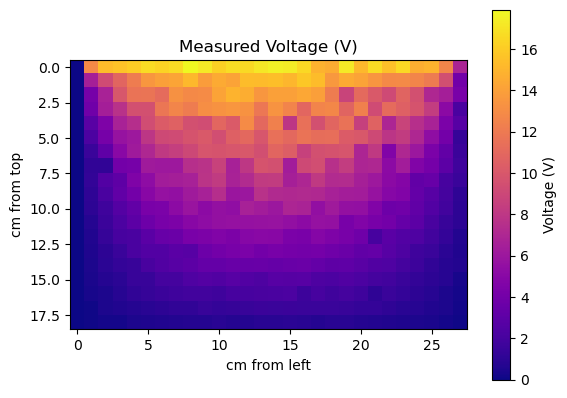

In [21]:
#read in measured data
measuredData = pd.read_csv('measuredData_laplace.csv')

plt.imshow(measuredData)
plt.colorbar(label="Voltage (V)")
plt.title("Measured Voltage (V)")
plt.xlabel("cm from left")
plt.ylabel("cm from top")

### Import finite difference technique results and plot

Note that the finite difference technique was easier to achieve through data analysis in excel, so it was done there (calculated with weighted averages in both x and y directions with the edges preset). This data was converted to a csv then imported.

Text(0, 0.5, 'cm from top')

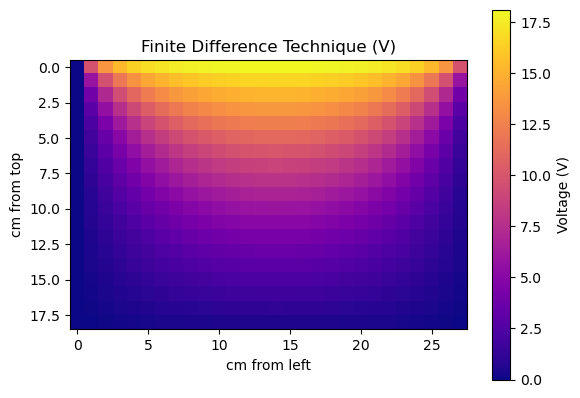

In [22]:
finiteDifference = pd.read_csv('finiteDifference.csv')


plt.figure()
plt.imshow(finiteDifference)
plt.colorbar(label="Voltage (V)")
plt.title("Finite Difference Technique (V)")
plt.xlabel("cm from left")
plt.ylabel("cm from top")

### Calculating finte difference residual plot

Text(0, 0.5, 'cm from top')

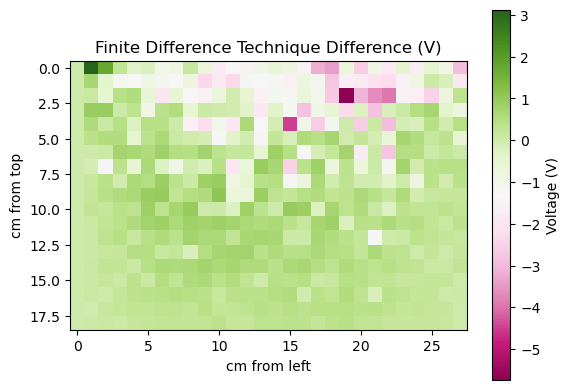

In [12]:
plt.imshow(measuredData-finiteDifference,cmap='PiYG')
plt.colorbar(label="Voltage (V)")
plt.title("Finite Difference Technique Difference (V)")
plt.xlabel("cm from left")
plt.ylabel("cm from top")

### Calculating analytical solution residual plot

Text(0, 0.5, 'cm from top')

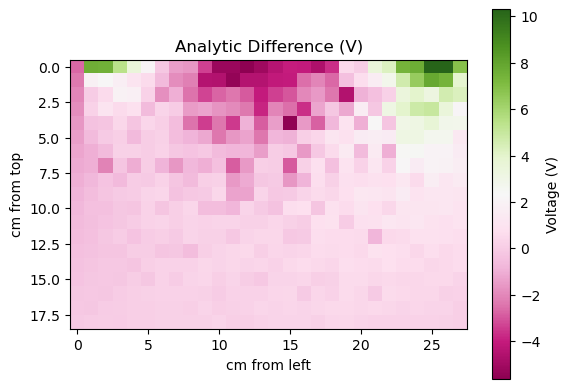

In [13]:
plt.imshow(measuredData-analyticArray,cmap='PiYG')
plt.colorbar(label="Voltage (V)")
plt.title("Analytic Difference (V)")
plt.xlabel("cm from left")
plt.ylabel("cm from top")

### Error analysis

Text(0.5, 0, 'Error (V)')

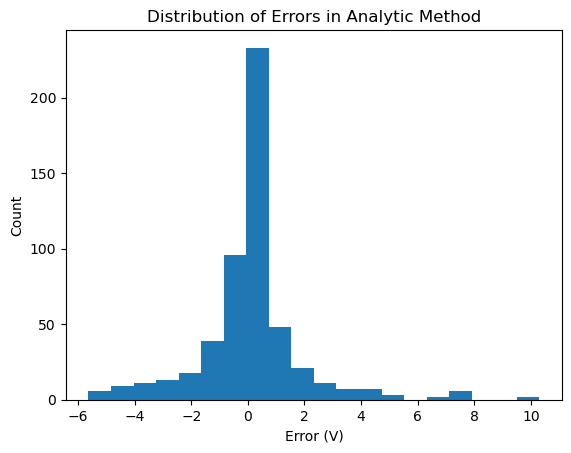

In [14]:
#calculate residuals within 1D arrays
flatAnalytic= np.ndarray.flatten(analyticArray)
flatFinite = finiteDifference.values.flatten()
flatData = measuredData.values.flatten()

#plot analytic residuals in a histogram
plt.hist(flatData-flatAnalytic,bins=20)
plt.title("Distribution of Errors in Analytic Method")
plt.ylabel("Count")
plt.xlabel("Error (V)")

Text(0.5, 0, 'Error (V)')

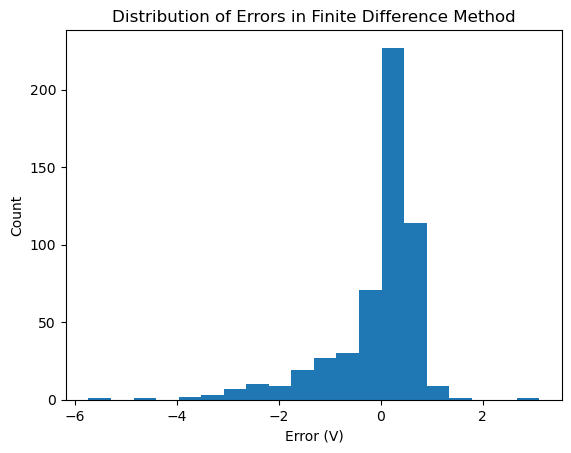

In [16]:
#plot finite difference residuals in a histogram
plt.hist(flatData-flatFinite,bins=20)
plt.title("Distribution of Errors in Finite Difference Method")
plt.ylabel("Count")
plt.xlabel("Error (V)")

Calculate Chi Squared Values

In [20]:
pointOnes = np.zeros(len(flatData))

pointOnes=pointOnes+0.1


analyticChi=0
for diffs in (flatData-flatAnalytic):
    analyticChi+=(diffs-0.1)**2/0.1
print("Analytic Solution:", analyticChi)


analyticFin=0
for diffs2 in (flatData-flatFinite):
    analyticFin+=(diffs2-0.1)**2/0.1
print("Finite Difference:", analyticFin)


Analytic Solution: 19297.017810764155
Finite Difference: 4513.625050000004
